## 1) Make a hypothesis about a correlation in a dataset and test the hypothesis using a statistical inference technique (such as the t-test)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import math
from matplotlib.pylab import rcParams
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols
import statsmodels.api as sm
import mpl_toolkits
%matplotlib inline

### Null Hypothesis:
#### H<sub>0</sub>: Single bedroom unit's rental price is almost equal all over Toronto area (μ = μ<sub>0</sub>).

### Alternate: 
#### H<sub>A</sub>: Single bedroom unit's rental price is higher than in 'Downtown Toronto' area compare to all over Toronto area (μ > μ<sub>0</sub>).

In [2]:
### Read the file
df = pd.read_excel('Toronto_apartment_rentals_2018.xlsx', sheet_name='toronto_rental_price', skiprows=0)
df.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,1,1.0,0,"8 Wellesley St E, Toronto, ON M4Y 3B2, Canada",43.665233,-79.384293,99
1,1,1.0,0,", Toronro M4V 1N5 ON, Canada",43.686511,-79.399522,150
2,1,1.0,0,"195 Wynford Dr, North York, ON M3C 3P3, Canada",43.723587,-79.324879,300
3,1,1.0,0,"89 Chestnut St, Toronto, ON M5G 1R1, Canada",43.654155,-79.385211,550
4,1,1.0,0,"89 Chestnut St, Toronto, ON M5G 1R1, Canada",43.654155,-79.385211,550


In [3]:
df.describe()

,Bedroom,Bathroom,Den,Lat,Long,Price
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,1.370107,1.237544,0.153025,43.703532,-79.500326,3627.912811
std,0.553493,0.431997,0.360172,0.692689,1.760654,27530.542058
min,1.000000,1.000000,0.000000,42.985767,-114.082215,65.000000
25%,1.000000,1.000000,0.000000,43.641355,-79.414319,1759.250000
50%,1.000000,1.000000,0.000000,43.650560,-79.387295,2100.000000
75%,2.000000,1.000000,0.000000,43.666613,-79.377198,2500.000000
max,3.000000,3.000000,1.000000,56.130366,-73.576385,535000.000000


In [4]:
### Make sure only Ontario records. If not remove them
df = df[df['Address'].str.contains("ON")]
df.describe()

,Bedroom,Bathroom,Den,Lat,Long,Price
count,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000
mean,1.361958,1.235457,0.151431,43.658790,-79.407203,3686.939058
std,0.545620,0.431498,0.358634,0.105970,0.196322,28045.175699
min,1.000000,1.000000,0.000000,42.985767,-81.243808,65.000000
25%,1.000000,1.000000,0.000000,43.641159,-79.413712,1777.000000
50%,1.000000,1.000000,0.000000,43.650092,-79.387295,2100.000000
75%,2.000000,1.000000,0.000000,43.665588,-79.377268,2500.000000
max,3.000000,3.000000,1.000000,44.121069,-77.888152,535000.000000


In [5]:
### Clean the data
### remove null records and duplicate records
df_clean=df.dropna().drop_duplicates(keep='first').reset_index(drop=True)
df_clean.describe()

,Bedroom,Bathroom,Den,Lat,Long,Price
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,1.358418,1.239158,0.151786,43.661334,-79.401948,2905.955357
std,0.558556,0.439011,0.359042,0.107338,0.202481,19084.626181
min,1.000000,1.000000,0.000000,42.985767,-81.243808,65.000000
25%,1.000000,1.000000,0.000000,43.641594,-79.409837,1750.000000
50%,1.000000,1.000000,0.000000,43.651070,-79.387295,2100.000000
75%,2.000000,1.000000,0.000000,43.666751,-79.376850,2500.000000
max,3.000000,3.000000,1.000000,44.121069,-77.888152,535000.000000


Text(0.5,1,'Checking for outliers in price')

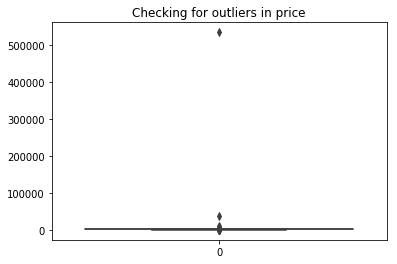

In [6]:
### Checking for outliers in price
box_plot = df_clean['Price']
sns.boxplot(data=box_plot)
plt.title("Checking for outliers in price")

In [7]:
### There are 2 outliers, but one is extremely out of range.
### Remove the outlier with the price 535,000 as this is not realistic
df_clean=df_clean.drop(df_clean.loc[df_clean['Price']==535000].index)
df_clean.describe()

,Bedroom,Bathroom,Den,Lat,Long,Price
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,1.358876,1.239464,0.151980,43.661323,-79.401976,2226.397190
std,0.558766,0.439208,0.359231,0.107406,0.202609,1474.815749
min,1.000000,1.000000,0.000000,42.985767,-81.243808,65.000000
25%,1.000000,1.000000,0.000000,43.641591,-79.409872,1750.000000
50%,1.000000,1.000000,0.000000,43.650560,-79.387295,2100.000000
75%,2.000000,1.000000,0.000000,43.666731,-79.376798,2500.000000
max,3.000000,3.000000,1.000000,44.121069,-77.888152,36900.000000


Text(0.5,1,'Checking for outliers in price')

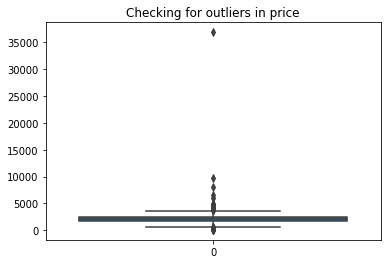

In [8]:
### Checking for outliers in price
box_plot = df_clean['Price']
sns.boxplot(data=box_plot)
plt.title("Checking for outliers in price")

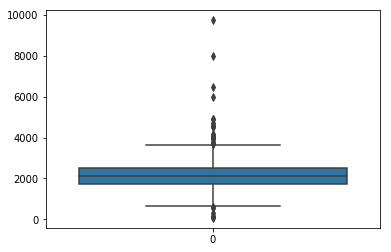

In [9]:
### Rent amount 36,900 is also not realistic.
###Remove the outlier with the price 36,900
df_clean=df_clean.drop(df_clean.loc[df_clean['Price']==36900].index)

### Checking for outliers in price
box_plot = df_clean['Price']
sns.boxplot(data=box_plot)

In [10]:
df_clean.sort_values("Price").head(10)

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
515,1,2.0,0,"Euclid Ave, Toronto, ON, Canada",43.658689,-79.412577,65
0,1,1.0,0,"8 Wellesley St E, Toronto, ON M4Y 3B2, Canada",43.665233,-79.384293,99
516,1,2.0,1,"2121 Lake Shore Blvd W, Etobicoke, ON M8V 4E9,...",43.627447,-79.478374,99
1,1,1.0,0,", Toronro M4V 1N5 ON, Canada",43.686511,-79.399522,150
2,1,1.0,0,"195 Wynford Dr, North York, ON M3C 3P3, Canada",43.723587,-79.324879,300
3,1,1.0,0,"89 Chestnut St, Toronto, ON M5G 1R1, Canada",43.654155,-79.385211,550
535,2,1.0,0,"Bathurst St, Toronto, ON M5S 2P9, Canada",43.658278,-79.408437,600
4,1,1.0,0,", Toronto m5s1x6 ON, Canada",43.665956,-79.404799,650
7,1,1.0,0,", Toronto M5G 1B1 ON",43.654723,-79.381400,700
5,1,1.0,0,", toronto m4b2z5 ON, Canada",43.705190,-79.323847,700


In [11]:
### Remove further outliers in Price. 
#### A single bed room apartment rental price less than or equal 300 is not realistic
df_clean=df_clean.drop(df_clean.loc[df_clean['Price'] <= 300].index)

In [12]:
### Get the Postalcode detail
df_postal = pd.read_excel('toronto_postal_detail.xlsx', sheet_name='postal-borough', skiprows=0)
df_postal.head()

,Postcode,Borough
0,M1A,Not assigned
1,M2A,Not assigned
2,M3A,North York
3,M4A,North York
4,M5A,Downtown Toronto


In [13]:
import re
def get_postalcode(addr):
    try:
        test = re.compile(r'[A-Z]\d[A-Z]')
        pos= test.search(addr.upper()).group()
    except:
        pos = "NAN"
    return pos

### Add a new column "POS" (First 3 character of the postal code) to the data
df_clean['ZIP'] = df_clean.apply(lambda row: get_postalcode(row['Address']), axis=1)
df_clean.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price,ZIP
3,1,1.0,0,"89 Chestnut St, Toronto, ON M5G 1R1, Canada",43.654155,-79.385211,550,M5G
4,1,1.0,0,", Toronto m5s1x6 ON, Canada",43.665956,-79.404799,650,M5S
5,1,1.0,0,", toronto m4b2z5 ON, Canada",43.705190,-79.323847,700,M4B
6,1,1.0,0,", M5A 2V3, Toronto, ON",43.654228,-79.367015,700,M5A
7,1,1.0,0,", Toronto M5G 1B1 ON",43.654723,-79.381400,700,M5G


In [14]:
### Geting the Borough name for the postal code
def get_borough(postal):
    try:
        pos= (df_postal.loc[df_postal['Postcode'] == postal])['Borough'].item()
    except:
        pos = "NAN"
    return pos
    
### Add a new column "POS" (First 3 character of the postal code) to the data
df_clean['Borough'] = df_clean.apply(lambda row: get_borough(row['ZIP']), axis=1)
df_clean.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price,ZIP,Borough
3,1,1.0,0,"89 Chestnut St, Toronto, ON M5G 1R1, Canada",43.654155,-79.385211,550,M5G,Downtown Toronto
4,1,1.0,0,", Toronto m5s1x6 ON, Canada",43.665956,-79.404799,650,M5S,Downtown Toronto
5,1,1.0,0,", toronto m4b2z5 ON, Canada",43.705190,-79.323847,700,M4B,East York
6,1,1.0,0,", M5A 2V3, Toronto, ON",43.654228,-79.367015,700,M5A,Downtown Toronto
7,1,1.0,0,", Toronto M5G 1B1 ON",43.654723,-79.381400,700,M5G,Downtown Toronto


In [15]:
### Analyse for only Single bedroom rental properties
df_single = df_clean.loc[df_clean["Bedroom"]==1]
df_single.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price,ZIP,Borough
3,1,1.0,0,"89 Chestnut St, Toronto, ON M5G 1R1, Canada",43.654155,-79.385211,550,M5G,Downtown Toronto
4,1,1.0,0,", Toronto m5s1x6 ON, Canada",43.665956,-79.404799,650,M5S,Downtown Toronto
5,1,1.0,0,", toronto m4b2z5 ON, Canada",43.705190,-79.323847,700,M4B,East York
6,1,1.0,0,", M5A 2V3, Toronto, ON",43.654228,-79.367015,700,M5A,Downtown Toronto
7,1,1.0,0,", Toronto M5G 1B1 ON",43.654723,-79.381400,700,M5G,Downtown Toronto


In [16]:
### Population of single bedroom unit
df_single.describe()

,Bedroom,Bathroom,Den,Lat,Long,Price
count,529.0,529.000000,529.000000,529.000000,529.000000,529.000000
mean,1.0,1.044423,0.223062,43.663757,-79.404812,1993.402647
std,0.0,0.193189,0.416694,0.089157,0.174764,542.415611
min,1.0,1.000000,0.000000,42.985767,-81.243808,550.000000
25%,1.0,1.000000,0.000000,43.641873,-79.400995,1700.000000
50%,1.0,1.000000,0.000000,43.651593,-79.387295,2000.000000
75%,1.0,1.000000,0.000000,43.665588,-79.377265,2300.000000
max,1.0,2.000000,1.000000,44.121069,-77.888152,4700.000000


In [17]:
### As per the aboove details
population_mean = int(round(df_single["Price"].mean()))
population_std = int(round(df_single["Price"].std()))
print("Population mean = " + str(population_mean))
print("Population sd = " + str( population_std))

Population mean = 1993
Population sd = 542


In [18]:
(df_postal.loc[df_postal['Borough'] == 'Downtown Toronto'])["Postcode"].unique()

array(['M5A', 'M5B', 'M5C', 'M5E', 'M5G', 'M6G', 'M5H', 'M5J', 'M5K',
       'M5L', 'M5S', 'M5T', 'M5V', 'M4W', 'M5W', 'M4X', 'M5X', 'M4Y'],
      dtype=object)

In [19]:
### Get the sample for 'Downtown Toronto' area
df_single_downtown = df_single.loc[df_single["Borough"]=='Downtown Toronto']

In [20]:
### No. of sample should be greater than 30 and less than 10% of the population
df_single_downtown_sam = df_single_downtown.sample(n=40, random_state=5)
df_single_downtown_sam.describe()

,Bedroom,Bathroom,Den,Lat,Long,Price
count,40.0,40.000000,40.000000,40.000000,40.000000,40.00000
mean,1.0,1.050000,0.300000,43.651456,-79.384429,2213.47500
std,0.0,0.220721,0.464095,0.010085,0.011341,442.60702
min,1.0,1.000000,0.000000,43.637524,-79.409942,1300.00000
25%,1.0,1.000000,0.000000,43.643914,-79.391039,1878.75000
50%,1.0,1.000000,0.000000,43.648364,-79.382458,2237.50000
75%,1.0,1.000000,1.000000,43.660123,-79.376978,2500.00000
max,1.0,2.000000,1.000000,43.671082,-79.358877,3300.00000


In [21]:
### As per the above sample, 
sample_mean = int(round(df_single_downtown_sam["Price"].mean()))
sample_no = int(round(df_single_downtown_sam["Price"].count()))

print("Sample mean = " + str(sample_mean))
print("Sample count = " + str(sample_no))


Sample mean = 2213
Sample count = 40


In [22]:
Z_score = (sample_mean - population_mean)/(population_std/math.sqrt(sample_no))
p = st.norm.cdf(Z_score)
print("z-scaore = " + str(Z_score))
print("p-value = " + str(p))

z-scaore = 2.5671626761514523
p-value = 0.9948732751480361


#### The Probablity to be more than higher rental value in Downtown Toronto, is 0.995
#### As a result we can reject the Null Hypothesis

In [67]:
# let shuffle the dataframe 10000 times
NUM_OF_SIMULATIONS = 1000
simulation = []

for x in range(0, NUM_OF_SIMULATIONS):
    # take the first number of water samples as the water data set
    sim_all_df = df_single.sample(n=40)
    # the rest of the samples we take as beer
    #sim_down_df = df_single_downtown.sample(n=40)
    # calculate the mean difference and store it in an array
    #simulation.append(sim_down_df.mean()['Price'] - sim_all_df.mean()['Price'])
    simulation.append(sim_all_df.mean()['Price'])

# construct a data frame base on the simulated data
simulation_df = pd.DataFrame(simulation, columns=['Rental Price']) 
simulation_df.head()

,Rental Price
0,1856.475
1,1925.750
2,2037.025
3,1804.750
4,1934.200


Text(2213,60,'Downtown Rental Price')

<Figure size 432x288 with 0 Axes>

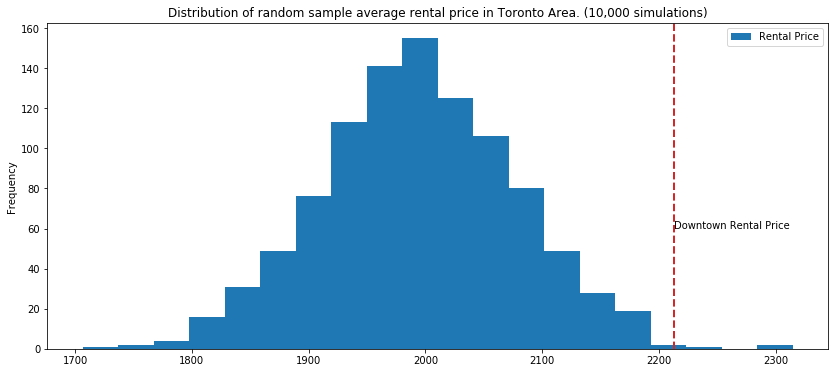

In [68]:
plt.figure()
experiment_mean_diff =sample_mean
simulation_df.plot.hist(stacked=True, bins=20, figsize=(14,6)).set_title("Distribution of random sample average rental price in Toronto Area. (10,000 simulations)")
plt.axvline(experiment_mean_diff, linewidth=2, color='#d62728', linestyle='dashed')
#plt.text(experiment_mean_diff+.1,800, 'Downtown Rental Price')
plt.text(experiment_mean_diff,60, 'Downtown Rental Price')

### 2) Build a predictive model using one of the techniques covered in the course i.e. ordinary least squares regression or Naïve Bayes

#### Building a model for the rental price in Downtown Toronto area

### Approach - 1 (Multi Linear Regression)

In [76]:
df_downtown=df_clean.loc[df_clean["Borough"]=='Downtown Toronto']
df_downtown.describe()

,Bedroom,Bathroom,Den,Lat,Long,Price
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,1.290188,1.234864,0.150313,43.651561,-79.384082,2397.805846
std,0.514769,0.439493,0.357752,0.009624,0.011053,851.873344
min,1.000000,1.000000,0.000000,43.634476,-79.428726,550.000000
25%,1.000000,1.000000,0.000000,43.643105,-79.391869,1950.000000
50%,1.000000,1.000000,0.000000,43.648973,-79.383028,2300.000000
75%,2.000000,1.000000,0.000000,43.659421,-79.378028,2700.000000
max,3.000000,3.000000,1.000000,43.679043,-79.353912,9750.000000


In [77]:
df_downtown.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price,ZIP,Borough
3,1,1.0,0,"89 Chestnut St, Toronto, ON M5G 1R1, Canada",43.654155,-79.385211,550,M5G,Downtown Toronto
4,1,1.0,0,", Toronto m5s1x6 ON, Canada",43.665956,-79.404799,650,M5S,Downtown Toronto
6,1,1.0,0,", M5A 2V3, Toronto, ON",43.654228,-79.367015,700,M5A,Downtown Toronto
7,1,1.0,0,", Toronto M5G 1B1 ON",43.654723,-79.381400,700,M5G,Downtown Toronto
8,1,1.0,0,"Bay st and college st, Toronto M5G 2C8 ON, Canada",43.660835,-79.385856,750,M5G,Downtown Toronto


In [78]:
df_downtown.reset_index(inplace = True)
df_downtown.head()

,index,Bedroom,Bathroom,Den,Address,Lat,Long,Price,ZIP,Borough
0,3,1,1.0,0,"89 Chestnut St, Toronto, ON M5G 1R1, Canada",43.654155,-79.385211,550,M5G,Downtown Toronto
1,4,1,1.0,0,", Toronto m5s1x6 ON, Canada",43.665956,-79.404799,650,M5S,Downtown Toronto
2,6,1,1.0,0,", M5A 2V3, Toronto, ON",43.654228,-79.367015,700,M5A,Downtown Toronto
3,7,1,1.0,0,", Toronto M5G 1B1 ON",43.654723,-79.381400,700,M5G,Downtown Toronto
4,8,1,1.0,0,"Bay st and college st, Toronto M5G 2C8 ON, Canada",43.660835,-79.385856,750,M5G,Downtown Toronto


In [79]:
model = ols("Price ~  Bedroom + Bathroom + Den + Lat + Long", data=df_downtown).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     71.55
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           1.11e-55
Time:                        22:56:50   Log-Likelihood:                -3776.3
No. Observations:                 479   AIC:                             7565.
Df Residuals:                     473   BIC:                             7590.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.127e+05   3.04e+05      1.359      0.1

### As per the Warning-2, We have to change/transform the value
#### So we introduce 2 new fields X and Y to represent the location coordinte.
 - For that take the Toronto City Hall's location as the refernce point X = -79.3832, Y = 43.6532

In [80]:
df_downtown["X"] = df_downtown["Long"] - (-79.3832)
df_downtown["Y"] = df_downtown["Lat"] - 43.6532
df_downtown.describe()

C:\Users\svallipuram\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\svallipuram\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,index,Bedroom,Bathroom,Den,Lat,Long,Price,X,Y
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,403.478079,1.290188,1.234864,0.150313,43.651561,-79.384082,2397.805846,-0.000882,-0.001639
std,210.401367,0.514769,0.439493,0.357752,0.009624,0.011053,851.873344,0.011053,0.009624
min,3.000000,1.000000,1.000000,0.000000,43.634476,-79.428726,550.000000,-0.045526,-0.018724
25%,247.000000,1.000000,1.000000,0.000000,43.643105,-79.391869,1950.000000,-0.008669,-0.010095
50%,394.000000,1.000000,1.000000,0.000000,43.648973,-79.383028,2300.000000,0.000172,-0.004227
75%,562.000000,2.000000,1.000000,0.000000,43.659421,-79.378028,2700.000000,0.005172,0.006221
max,783.000000,3.000000,3.000000,1.000000,43.679043,-79.353912,9750.000000,0.029288,0.025843


In [81]:
model = ols("Price ~  Bedroom + Bathroom + Den + X + Y", data=df_downtown).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     71.55
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           1.11e-55
Time:                        22:56:56   Log-Likelihood:                -3776.3
No. Observations:                 479   AIC:                             7565.
Df Residuals:                     473   BIC:                             7590.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    758.5789     94.585      8.020      0.0

#### The p-value for the variable 'X' is 0.820 > 0.05 (As it is was greater than the value, which is statistically accepted, we can remove this variable from the model)

In [82]:
model = ols("Price ~  Bedroom + Bathroom + Den + Y", data=df_downtown).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     89.60
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           1.13e-56
Time:                        22:56:56   Log-Likelihood:                -3776.3
No. Observations:                 479   AIC:                             7563.
Df Residuals:                     474   BIC:                             7584.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    760.0225     94.279      8.061      0.0

### Evalauting the fit model

Text(0.5,1,'Predictions vs. Original Prices')

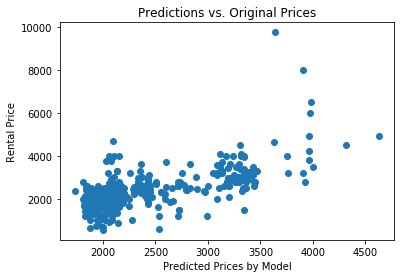

In [83]:
predicted_prices = model.fittedvalues

plt.scatter(predicted_prices, df_downtown["Price"])

plt.xlabel("Predicted Prices by Model")
plt.ylabel("Rental Price")
plt.title("Predictions vs. Original Prices")

Text(0.5,1,'Fitted Values vs. Residuals')

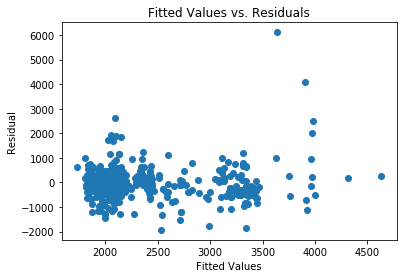

In [84]:
x = model.fittedvalues
y = model.resid
plt.scatter(x, y)

plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

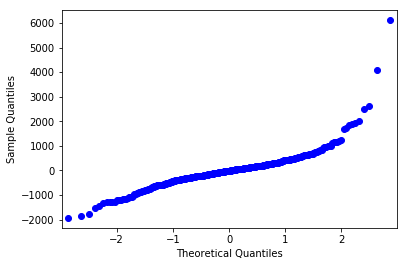

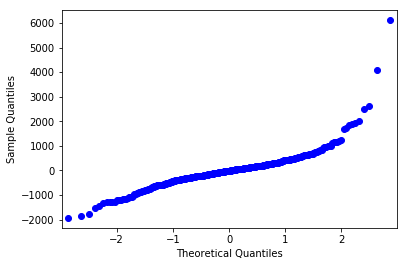

In [32]:
sm.qqplot(model.resid)

### Identifing Outliers
***Outliers are marked with a red circle:***

Text(0.5,1,'Predictions vs. Original Prices')

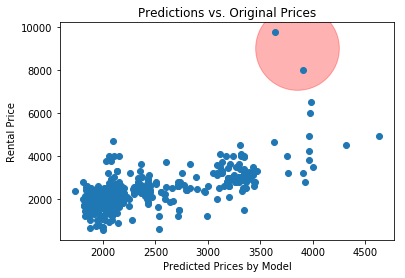

In [33]:

plt.scatter(3850, 9000, s=7000, alpha=0.3, c = 'r' )


predicted_prices = model.fittedvalues

plt.scatter(predicted_prices, df_downtown["Price"])

plt.xlabel("Predicted Prices by Model")
plt.ylabel("Rental Price")
plt.title("Predictions vs. Original Prices")

### Identifing High Leverage Points: 

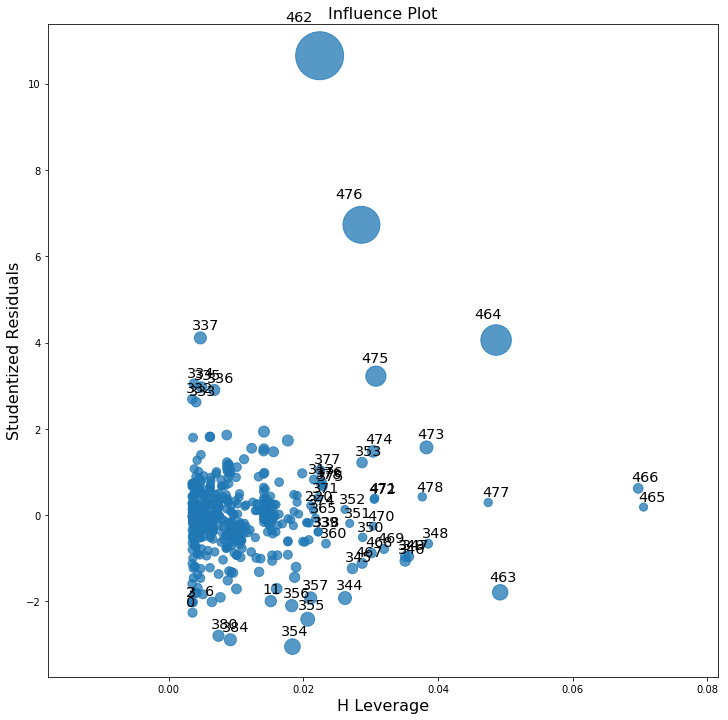

In [34]:
fig, ax = plt.subplots(figsize=(12,12))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

#### 462, 476, 475, 464, 337, 354, 463 are observed as high leverage points.

### Removing Outliers

In [35]:
df_downtown['Fitted_Values'] = model.fittedvalues
df_downtown.loc[df_downtown["Price"]>7000] 

C:\Users\svallipuram\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,index,Bedroom,Bathroom,Den,Address,Lat,Long,Price,ZIP,Borough,X,Y,Fitted_Values
462,749,2,2.5,0,"311 Bay St, Toronto, ON M5H 4G5, Canada",43.649783,-79.38044,9750,M5H,Downtown Toronto,0.00276,-0.003417,3638.969317
476,778,3,2.0,0,"21 Widmer St, Toronto, ON M5V 0B8, Canada",43.647226,-79.39110,8000,M5V,Downtown Toronto,-0.00790,-0.005974,3905.611505


In [36]:
df_downtown.loc[[462, 476, 475, 464, 337, 354, 463]]

,index,Bedroom,Bathroom,Den,Address,Lat,Long,Price,ZIP,Borough,X,Y,Fitted_Values
462,749,2,2.5,0,"311 Bay St, Toronto, ON M5H 4G5, Canada",43.649783,-79.380440,9750,M5H,Downtown Toronto,0.002760,-0.003417,3638.969317
476,778,3,2.0,0,"21 Widmer St, Toronto, ON M5V 0B8, Canada",43.647226,-79.391100,8000,M5V,Downtown Toronto,-0.007900,-0.005974,3905.611505
475,777,3,2.0,0,", toronto M5V 3z4 ON, Canada",43.641012,-79.394948,6000,M5V,Downtown Toronto,-0.011748,-0.012188,3973.059931
464,751,2,3.0,0,"180 University Ave, Toronto, ON M5H 0A2, Canada",43.648953,-79.385768,6500,M5H,Downtown Toronto,-0.002568,-0.004247,3985.700599
337,502,1,1.0,0,"80 Blue Jays Way, Toronto, ON M5V 2G3, Canada",43.645297,-79.392397,4700,M5V,Downtown Toronto,-0.009197,-0.007903,2097.867425
354,535,2,1.0,0,"Bathurst St, Toronto, ON M5S 2P9, Canada",43.658278,-79.408437,600,M5S,Downtown Toronto,-0.025237,0.005078,2533.575074
463,750,2,3.0,0,"210 Victoria St #400, Toronto, ON M5B 2R3, Canada",43.654624,-79.379076,2800,M5B,Downtown Toronto,0.004124,0.001424,3924.144155


In [37]:
model = ols("Price ~  Bedroom + Bathroom + Den + Y", data=df_downtown).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     89.60
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           1.13e-56
Time:                        22:51:18   Log-Likelihood:                -3776.3
No. Observations:                 479   AIC:                             7563.
Df Residuals:                     474   BIC:                             7584.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    760.0225     94.279      8.061      0.0

In [38]:
df_new_model=df_downtown.drop([462, 476, 475, 464, 337, 354, 463] )
new_model = ols("Price ~  Bedroom + Bathroom + Den + Y", data=df_new_model).fit()
print(new_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     102.9
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           8.65e-63
Time:                        22:51:18   Log-Likelihood:                -3602.9
No. Observations:                 472   AIC:                             7216.
Df Residuals:                     467   BIC:                             7237.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    946.8469     75.606     12.523      0.0

### By removing these outliers, we have increased the R sqared value from  0.431 to 0.469, significantly making the model a much better fit for the data. 


#### The Multi Linear Regression model will be 
####        Price = 946.8469 + 568.4116 x Bedrooms + 507.0137 x Bathroom + 294.1430 x Den - 8983.1836 x (Lat - 43.6532)



### Approach - 2  - Creating and Training the Model

### Analysing the price with each variable

Text(0.5,1,'Relationship between Price and Bedrrom')

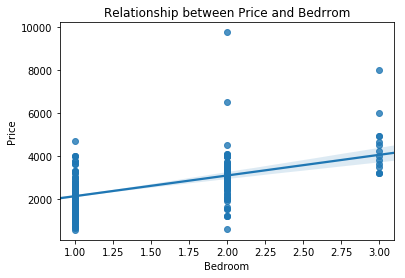

In [39]:
sns.regplot(y="Price", x="Bedroom", data=df_downtown, fit_reg = True)
plt.title("Relationship between Price and Bedrrom")

Text(0.5,1,'Relationship between Price and Bathroom')

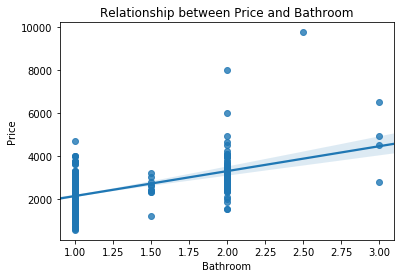

In [40]:
sns.regplot(y="Price", x="Bathroom", data=df_downtown, fit_reg = True)
plt.title("Relationship between Price and Bathroom")

Text(0.5,1,'Relationship between Price and Den')

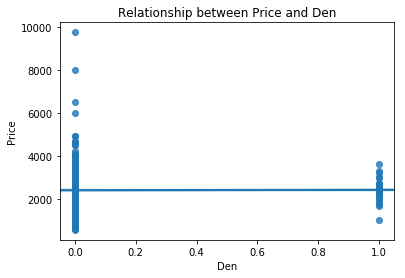

In [41]:
sns.regplot(y="Price", x="Den", data=df_downtown, fit_reg = True)
plt.title("Relationship between Price and Den")

Text(0.5,1,'Relationship between Price and Y (Latitude difference)')

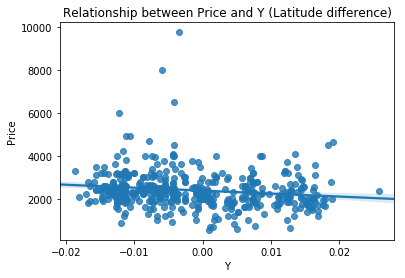

In [42]:
sns.regplot(y="Price", x="Y", data=df_downtown, fit_reg = True)
plt.title("Relationship between Price and Y (Latitude difference)")

Text(0.5,1,'Relationship between Price and X (Longitude difference)')

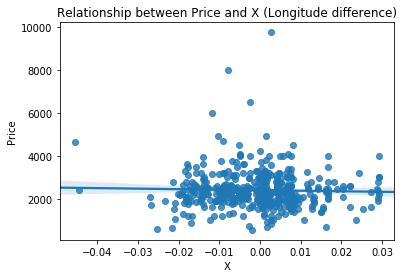

In [43]:
sns.regplot(y="Price", x="X", data=df_downtown, fit_reg = True)
plt.title("Relationship between Price and X (Longitude difference)")

In [44]:
y = df_downtown["Price"]
X = df_downtown[['Bedroom', 'Bathroom', 'Den', 'X', 'Y']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=105) ## 30% for test and the rest for training

In [45]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
results = lm.fit(X_train,y_train)
results

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,1,'Prediction Vs Actual Price')

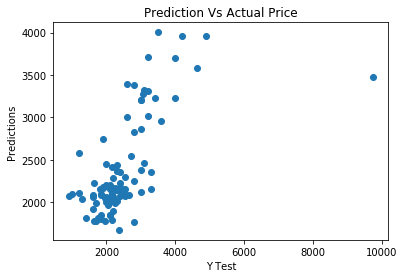

In [46]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')
plt.title("Prediction Vs Actual Price")

In [47]:
from sklearn import metrics
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MSE:  629212.1082470532
RMSE:  793.228912891514


C:\Users\svallipuram\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


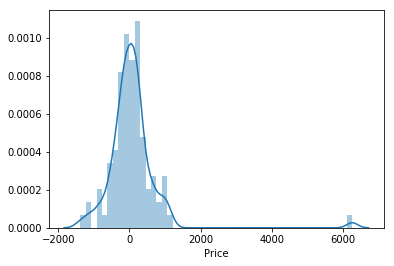

In [48]:
sns.distplot((y_test-predictions),bins=50)

In [49]:
results.score(X_test,y_test)

0.41446173875791475

#### As the model accuracy is around 41% we would like to try with GradientBoostingRegressor

In [50]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 100, max_depth = 4, min_samples_split =2,
          learning_rate = 0.1, loss = 'ls',random_state=1)
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

In [51]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 10, max_depth = 4, min_samples_split =2,
          learning_rate = 0.1, loss = 'ls',random_state=1)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.2802999413978736